# SUBJECT1

1. Import pandas and numpy libraries.
2. Read the Esense sensor readings csv file into a pandas Dataframe and converting UNIX time to Local TimeZone
3. Upsample Esense data to 100Hz to match with that of Bangle.js Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_sub1=pd.read_csv('df_sub1.csv')

# Subject 2

In [5]:
df_sub2=pd.read_csv('df_sub2.csv')

In [6]:
df_sub2=pd.DataFrame(df_sub2)

In [7]:
df_sub2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75890 entries, 0 to 75889
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   E1      75890 non-null  float64
 1   E2      75890 non-null  float64
 2   E3      75890 non-null  float64
 3   E4      75890 non-null  float64
 4   E5      75890 non-null  float64
 5   E6      75890 non-null  float64
 6   Label   57036 non-null  object 
 7   A1      75890 non-null  float64
 8   A2      75890 non-null  float64
 9   A3      75890 non-null  float64
 10  W1      75890 non-null  float64
 11  W2      75890 non-null  float64
 12  W3      75890 non-null  float64
dtypes: float64(12), object(1)
memory usage: 7.5+ MB


## Concat the dataframes of 2 subjects

In [8]:
frames=[df_sub1,df_sub2]
combined_frame=pd.concat(frames)

In [9]:
combined_frame.loc[combined_frame['Label'] == 'dribbling']

,E1,E2,E3,E4,E5,E6,Label,A1,A2,A3,W1,W2,W3
32174,-0.616943,-0.362305,-0.178467,-163.353659,-113.414634,38.871951,dribbling,-0.86426,-0.49463,0.34448,0.50708,0.84814,0.93628
32175,-0.607544,-0.351288,-0.175659,-163.544207,-113.433689,39.249238,dribbling,-0.85718,-0.49585,0.30151,0.48926,0.81689,0.90112
32176,-0.598145,-0.340271,-0.172852,-163.734756,-113.452744,39.626524,dribbling,-0.93701,-0.39648,0.08472,0.48022,0.75684,0.85718
32177,-0.579346,-0.318237,-0.167236,-164.115854,-113.490854,40.381098,dribbling,-1.00317,-0.24487,-0.07593,0.43359,0.66968,0.84961
32178,-0.569946,-0.307220,-0.164429,-164.306402,-113.509909,40.758384,dribbling,-1.05054,-0.13062,-0.13770,0.42041,0.64136,0.77393
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46785,-0.883362,-0.218109,-0.134979,-4.649390,5.114329,-9.607470,dribbling,-1.70679,-0.06372,1.43555,-0.03516,0.17358,1.29932
46786,-0.893066,-0.220947,-0.133545,-3.963415,5.121951,-8.932927,dribbling,-1.58447,-0.11304,1.28076,-0.02881,0.14282,1.31006
46787,-0.845459,-0.143799,-0.145996,9.695122,4.939024,1.890244,dribbling,-1.05371,-0.17627,0.80176,-0.02661,0.08984,1.31104
46788,-0.843533,-0.139838,-0.148139,9.684959,5.318428,2.063008,dribbling,-0.88794,-0.34277,0.70703,-0.02856,0.02100,1.29346


In [10]:
combined_frame['Label'].value_counts()

walking      24948
layup        23100
running      19824
shooting     17976
dribbling    14616
Name: Label, dtype: int64

## Balancing the data for each class

In [12]:
walking= combined_frame[combined_frame['Label']=='walking'].copy()
layup= combined_frame[combined_frame['Label']=='layup'].copy()
running= combined_frame[combined_frame['Label']=='running'].copy()
shooting= combined_frame[combined_frame['Label']=='shooting'].copy()
dribbling= combined_frame[combined_frame['Label']=='dribbling'].copy()
null= combined_frame[combined_frame['Label']=='null'].head(14616).copy()

In [13]:
balanced_data=pd.DataFrame()
balanced_data=balanced_data.append([walking,layup,running,shooting,dribbling,null])

In [14]:
balanced_data['Label'].value_counts()

walking      24948
layup        23100
running      19824
shooting     17976
dribbling    14616
Name: Label, dtype: int64

## Encoding the labels for training

In [15]:
from sklearn.preprocessing import LabelEncoder

Label = LabelEncoder()
balanced_data['label']=Label.fit_transform(balanced_data['Label'])
Label.classes_

array(['dribbling', 'layup', 'running', 'shooting', 'walking'],
      dtype=object)

## Standardize the data using Standart Scaler
### It normalizes each data value x by (x-mean/std_dev(data[column]))


In [16]:
column = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'A1', 'A2', 'A3', 'W1', 'W2', 'W3']
X=balanced_data[column]
Y=balanced_data['label']


In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(X)

scaledx=pd.DataFrame(data=x, columns=column)
scaledx['label']=Y.values


In [18]:
scaledx

,E1,E2,E3,E4,E5,E6,A1,A2,A3,W1,W2,W3,label
0,-0.473367,0.056240,-0.168178,0.000452,-0.195762,0.386580,0.200792,0.159041,-0.115756,-0.119580,-0.087014,0.976579,4
1,-0.435432,0.056839,-0.064521,0.023313,-0.242634,0.377261,0.202060,0.148991,-0.114302,-0.057429,-0.133341,1.026679,4
2,-0.359564,0.058035,0.142794,0.069036,-0.336380,0.358622,0.207484,0.150158,-0.126777,0.174546,-0.010854,0.503222,4
3,-0.321630,0.058634,0.246451,0.091897,-0.383252,0.349303,0.210360,0.150398,-0.131099,0.351088,-0.010854,0.403716,4
4,-0.283695,0.059232,0.350108,0.114758,-0.430125,0.339983,0.217065,0.148531,-0.138290,0.559136,-0.064851,0.327009,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100459,-0.249641,0.240904,-1.175895,0.312840,0.471130,-0.375925,-0.701959,0.105293,2.871915,-0.941576,-0.457303,1.884955,0
100460,-0.274320,0.233948,-1.169781,0.328965,0.471379,-0.353754,-0.542081,0.058083,2.567816,-0.933986,-0.493108,1.900154,0
100461,-0.153254,0.423025,-1.222858,0.650025,0.465420,0.001983,0.151647,-0.002442,1.626777,-0.931357,-0.554776,1.901541,0
100462,-0.148356,0.432731,-1.231994,0.649786,0.477778,0.007662,0.368317,-0.161820,1.440671,-0.933687,-0.634905,1.876661,0


## Constructing the Frames/Windows

In [19]:
import scipy.stats as stats

frequency=100
frame_size = frequency*5
hopsize = frequency*2




#### The function frames(dataFrame,frameSize,hopsize) takes the parameters and returns the lists(ie . frames and labels) which are collection of frames and labels differing by the hopsize to get data for the duration of activity
#### Here the duration is taken to be 5 seconds . This implies that each frame(list) has the sensor data for a duration of 5 seconds. Also each frame in frames differs by 2 seconds as calculated in the previous cell 
     

In [20]:
def frames(dataFrame,frameSize,hopsize):
    featureCount=12
    frames=[]
    labels=[]
    for i in range(0,len(dataFrame)-frameSize,hopsize):
        E1=dataFrame['E1'].values[i : i+frameSize]
        E2=dataFrame['E2'].values[i : i+frameSize]
        E3=dataFrame['E3'].values[i : i+frameSize]
        E4=dataFrame['E4'].values[i : i+frameSize]
        E5=dataFrame['E5'].values[i : i+frameSize]
        E6=dataFrame['E6'].values[i : i+frameSize]
        A1=dataFrame['A1'].values[i : i+frameSize]
        A2=dataFrame['A2'].values[i : i+frameSize]
        A3=dataFrame['A3'].values[i : i+frameSize]
        W1=dataFrame['W1'].values[i : i+frameSize]
        W2=dataFrame['W2'].values[i : i+frameSize]
        W3=dataFrame['W3'].values[i : i+frameSize]


        label= stats.mode(dataFrame['label'][i : i+frameSize])[0][0]
        frames.append([E1, E2, E3, E4, E5, E6, A1, A2, A3, W1, W2, W3])
        labels.append(label)
    
    frames=np.asarray(frames).reshape(-1,frameSize,featureCount)
    labels=np.asarray(labels)
    return frames,labels



In [21]:
X,y = frames(scaledx,frame_size,hopsize)

#### Here we are getting 436 frames with each frame of size (500,12) i.e 500 entries with 12 features(classes) and the corresponding labels. That is each frame has a distinct label which is calculated with the help of taking mode of labels for the activity as in previous cell

In [22]:
X.shape , y.shape

((500, 500, 12), (500,))

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y , test_size=0.3,random_state=0, stratify= y)

In [24]:
X_train.shape,X_test.shape

((350, 500, 12), (150, 500, 12))

In [25]:
X_train[0].shape

(500, 12)

In [26]:
#### The model is implementing Conv2D layer and hence it requires data of 3 dimensions at least. The train and testing data is reshaped below

In [28]:
X_train=X_train.reshape(350, 500, 12, 1)
X_test=X_test.reshape(150, 500, 12,1)


In [29]:
X_train[0].shape

(500, 12, 1)

# Building the model

In [37]:
import tensorflow as tf

In [65]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,ReLU,BatchNormalization,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(2,2),activation='relu',input_shape=X_train[0].shape))

model.add(Dropout(0.3))

model.add(Conv2D(32,(2,2),activation='relu'))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(6,activation='softmax'))


In [66]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [67]:
history=model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test),verbose=1)

Epoch 1/15
11/11 [==============================] - 2s 169ms/step - loss: 1.8930 - accuracy: 0.3943 - val_loss: 1.0232 - val_accuracy: 0.6467
Epoch 2/15
11/11 [==============================] - 2s 147ms/step - loss: 1.0576 - accuracy: 0.5714 - val_loss: 0.6615 - val_accuracy: 0.8800
Epoch 3/15
11/11 [==============================] - 2s 149ms/step - loss: 0.7403 - accuracy: 0.7286 - val_loss: 0.4412 - val_accuracy: 0.9000
Epoch 4/15
11/11 [==============================] - 2s 149ms/step - loss: 0.5797 - accuracy: 0.7686 - val_loss: 0.2684 - val_accuracy: 0.9600
Epoch 5/15
11/11 [==============================] - 2s 149ms/step - loss: 0.4436 - accuracy: 0.8143 - val_loss: 0.1999 - val_accuracy: 0.9600
Epoch 6/15
11/11 [==============================] - 2s 149ms/step - loss: 0.2752 - accuracy: 0.9057 - val_loss: 0.1274 - val_accuracy: 0.9800
Epoch 7/15
11/11 [==============================] - 2s 147ms/step - loss: 0.3427 - accuracy: 0.8857 - val_loss: 0.1768 - val_accuracy: 0.9533
Epoch 

### Plotting the learning curve

In [68]:
import matplotlib.pyplot as plt
def plotCurve(history,epochs):
    epoc_range=range(1,epochs+1)
    plt.plot(epoc_range,history.history['accuracy'])
    plt.plot(epoc_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train','Val'])
    plt.show()


    plt.plot(epoc_range,history.history['loss'])
    plt.plot(epoc_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train','Val'])
    plt.show()




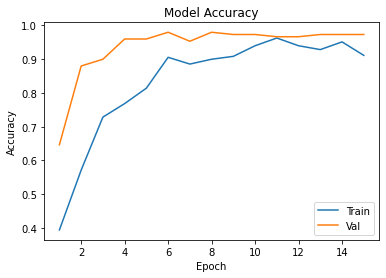

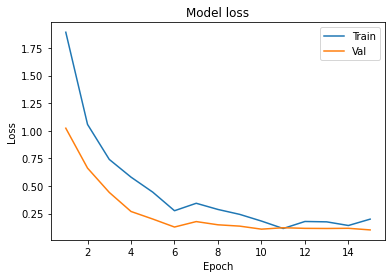

In [69]:
plotCurve(history,15)

In [45]:
from keras.models import save_model
model.save('Model1')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Model1\assets


## Confusion Matrix

In [74]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

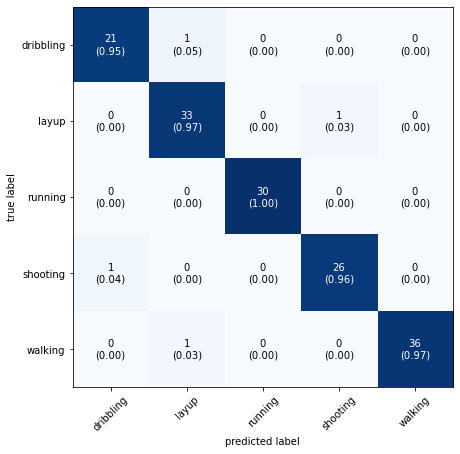

In [82]:
y_pred=model.predict_classes(X_test)
cmatrix=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cmatrix,class_names=Label.classes_, show_normed=True,figsize=(7,7))